Stroke is ranked as the second leading cause of death worldwide by the World Health Organization (WHO).
This dataset has been created to predict the likelihood of a patient suffering from a stroke based on factors such as gender, age and smoking status.

Importing Librairies

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

Importing Data

In [22]:
df = pd.read_csv("brain_stroke.csv")
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [24]:
#Dimensions of the dataframe
df.shape

(4981, 11)

Describe data

In [25]:
# Get Various statistics for each numerical column in the input data frame. 
#The statistics include the count, mean, standard deviation, minimum, 25th percentile (also known as the lower quartile), 50th percentile (also known as the median), 75th percentile (also known as the upper quartile), and the maximum value.
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Data Cleaning

<AxesSubplot: >

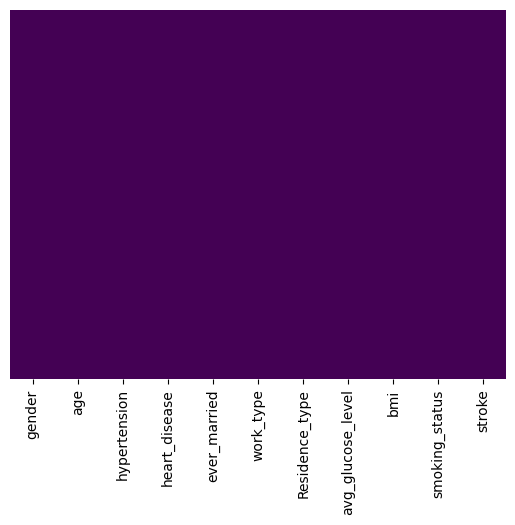

In [26]:
#HeatMap to check the Missing values/Null values of all columns
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
#The dataset has no missing values

There is no missing values in the dataset

Data Preprocessing

In [27]:
#Encoding categorical variables into numerical values. 
df["gender"]=LabelEncoder().fit_transform(df["gender"])
df["ever_married"]=LabelEncoder().fit_transform(df["ever_married"])
df["work_type"]=LabelEncoder().fit_transform(df["work_type"])
df["Residence_type"]=LabelEncoder().fit_transform(df["Residence_type"])
df["smoking_status"]=LabelEncoder().fit_transform(df["smoking_status"])
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,1,1,228.69,36.6,1,1
1,1,80.0,0,1,1,1,0,105.92,32.5,2,1
2,0,49.0,0,0,1,1,1,171.23,34.4,3,1
3,0,79.0,1,0,1,2,0,174.12,24.0,2,1
4,1,81.0,0,0,1,1,1,186.21,29.0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,41.0,0,0,0,1,0,70.15,29.8,1,0
4977,1,40.0,0,0,1,1,1,191.15,31.1,3,0
4978,0,45.0,1,0,1,0,0,95.02,31.8,3,0
4979,1,40.0,0,0,1,1,0,83.94,30.0,3,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   int32  
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   int32  
 5   work_type          4981 non-null   int32  
 6   Residence_type     4981 non-null   int32  
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   int32  
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 330.9 KB


In [29]:
#Shuffle the rows of the dataframe
df = df.sample(frac = 1).reset_index(drop = True)
df

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,37.00,0,0,1,1,1,91.45,25.8,0,0
1,0,13.00,0,0,0,3,0,73.48,22.9,0,0
2,0,43.00,0,0,1,2,1,89.73,23.5,1,0
3,1,66.00,0,0,1,2,1,85.82,27.8,2,0
4,0,30.00,0,0,0,1,0,118.62,29.7,0,0
...,...,...,...,...,...,...,...,...,...,...,...
4976,1,0.24,0,0,0,3,1,57.09,19.4,0,0
4977,1,71.00,1,0,1,0,1,153.08,21.5,0,0
4978,0,79.00,0,0,1,2,0,97.81,26.6,1,0
4979,1,65.00,0,0,1,2,1,68.43,29.6,1,1


Data Splitting

In [30]:
#split the original DataFrame df into two sets: train_df and test_df with 80% of the data for training and 20% for testing. 
train, test = train_test_split(df, test_size=0.2, random_state=42)

print('Dimensions of the data using for training: ', train.shape)
print('Dimensions of the data using for test: ', test.shape)

Dimensions of the data using for training:  (3984, 11)
Dimensions of the data using for test:  (997, 11)


In [31]:
#split the data into the features (x_train) and the target variable (y_train). 
# The x_train array is used as the input to the machine learning model, while the y_train array is used as the target output that the model is trying to predict.
x_train = train.iloc[:,:-1].values
y_train = train.iloc[:,-1].values

In [32]:
x_test = test.iloc[:,:-1].values
y_test = test.iloc[:,-1].values

Data Imbalacing

Data imbalancing is a common issue in machine learning where the distribution of the target classes in a dataset is not equal.

In [33]:
def get_labels(a,b):
  if a==0:
    label1="Stroke"
  else:
    label1="Not a Stroke"
  if b==0:
    label2="Stroke"
  else:
    label2="Not a Stroke"
  return label1,label2    

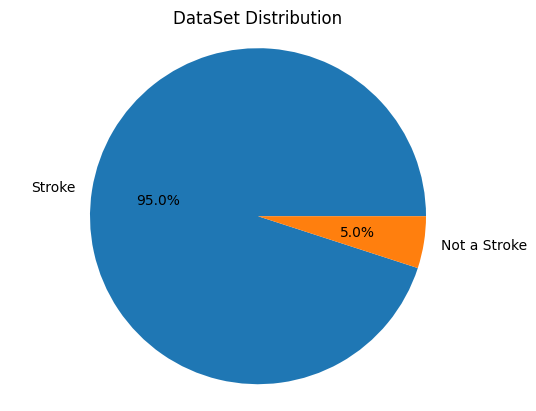

In [34]:
labels=list(Counter(y_train).keys())
Data = [Counter(y_train)[0],Counter(y_train)[1]]
label1,label2=get_labels(labels[0],labels[1])
my_labels = label1,label2
plt.pie(Data,labels=my_labels,autopct='%1.1f%%')
plt.title('DataSet Distribution')
plt.axis('equal')
plt.show()
#The data seems not balanced.

In [35]:
# we using the RandomOverSampler method from the imbalanced-learn library to balance the data in the x_train and y_train arrays.

from imblearn.over_sampling import RandomOverSampler

os=RandomOverSampler(sampling_strategy=0.75)
x_train,y_train=os.fit_resample(x_train, y_train)
Counter(y_train)

Counter({0: 3785, 1: 2838})

The RandomOverSampler method works by randomly duplicating samples from the minority class until the desired balance is achieved. The duplicate samples are selected randomly, ensuring that the structure of the minority class is preserved.

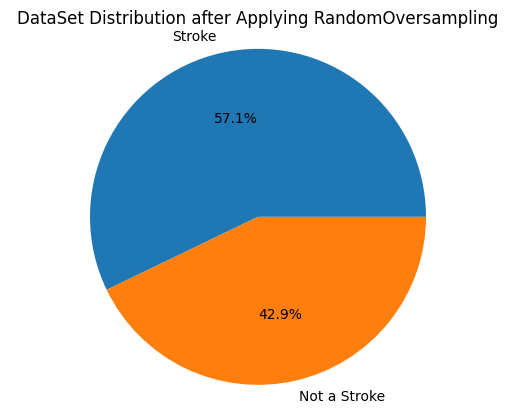

In [36]:
labels=list(Counter(y_train).keys())
Data = [Counter(y_train)[0],Counter(y_train)[1]]
label1,label2=get_labels(labels[0],labels[1])
my_labels = label1,label2
plt.pie(Data,labels=my_labels,autopct='%1.1f%%')
plt.title('DataSet Distribution after Applying RandomOversampling')
plt.axis('equal')
plt.show()
# Now the data distrbution looks balanced.

Feature Scaling

Feature scaling is a preprocessing step that transforms the features of a dataset to have similar ranges. This is important because many machine learning algorithms use distance-based methods, such as Euclidean distance, to make predictions, and features with different ranges can have a disproportionate impact on the result.

In [37]:
from sklearn.preprocessing import StandardScaler
x_scaled=StandardScaler().fit_transform(x_train)

In [38]:
x_scaled

array([[ 1.16957008, -2.13108734, -0.44968273, ..., -0.381051  ,
        -1.88670168, -1.36898715],
       [-0.85501503, -0.36893878, -0.44968273, ..., -0.99691127,
         0.43610384, -1.36898715],
       [ 1.16957008, -0.54515364, -0.44968273, ..., -0.2593682 ,
         0.17285255, -1.36898715],
       ...,
       [-0.85501503,  0.15970579, -0.44968273, ..., -0.91899796,
         1.2877992 ,  0.56135177],
       [ 1.16957008,  0.68835036, -0.44968273, ...,  1.39134074,
        -0.13685485,  1.52652123],
       [-0.85501503,  1.08483378, -0.44968273, ..., -1.09062519,
        -0.77175503, -1.36898715]])

In [39]:
x_train = x_scaled

Support Vector Classification Model

In [40]:
model_svc = SVC()
model_svc.fit(x_train, y_train)

SVC()

In [41]:
y_pred_SVC = model_svc.predict(x_test)

print("Confustion Matrix is as follows  \n{}".format(confusion_matrix(y_test,y_pred_SVC)))
print("Accuracy : {} ".format(accuracy_score(y_test,y_pred_SVC)))
print("Classification Reports are as follows  \n{}".format(classification_report(y_test,y_pred_SVC)))

Confustion Matrix is as follows  
[[948   0]
 [ 49   0]]
Accuracy : 0.950852557673019 
Classification Reports are as follows  
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       948
           1       0.00      0.00      0.00        49

    accuracy                           0.95       997
   macro avg       0.48      0.50      0.49       997
weighted avg       0.90      0.95      0.93       997



C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\dell\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\metrics\_classification.py:1344: U

Decision Tree Model

In [42]:
model_dt = DecisionTreeClassifier()
model_dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [43]:
y_pred_dt = model_dt.predict(x_test)

print("Confustion Matrix is as follows  \n{}".format(confusion_matrix(y_test,y_pred_dt)))
print("Accuracy : {} ".format(accuracy_score(y_test,y_pred_dt)))
print("Classification Reports are as follows  \n{}".format(classification_report(y_test,y_pred_dt)))

Confustion Matrix is as follows  
[[944   4]
 [ 49   0]]
Accuracy : 0.9468405215646941 
Classification Reports are as follows  
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       948
           1       0.00      0.00      0.00        49

    accuracy                           0.95       997
   macro avg       0.48      0.50      0.49       997
weighted avg       0.90      0.95      0.92       997

